In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.typing import NDArray

In [2]:
df = pd.read_csv('data/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Explanation (from kaggle)
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:



In [3]:
def plot_grid(dataframe):
    # Select 9 random samples from the dataframe
    sample_df = dataframe.sample(4, random_state=42)
    
    # Create a 3x3 subplot
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    
    for i, ax in enumerate(axes.flat):
        # Extract the pixel values and reshape into a 28x28 array
        pixel_values = sample_df.iloc[i, 1:].values.reshape(28, 28)
        
        # Plot the image on the current subplot
        ax.imshow(pixel_values, cmap='gray')
        ax.set_title(f"Label: {sample_df.iloc[i, 0]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def count_labels_percentage_sorted(dataframe):
    label_percentages = dataframe['label'].value_counts(normalize=True) * 100
    return label_percentages.sort_index()


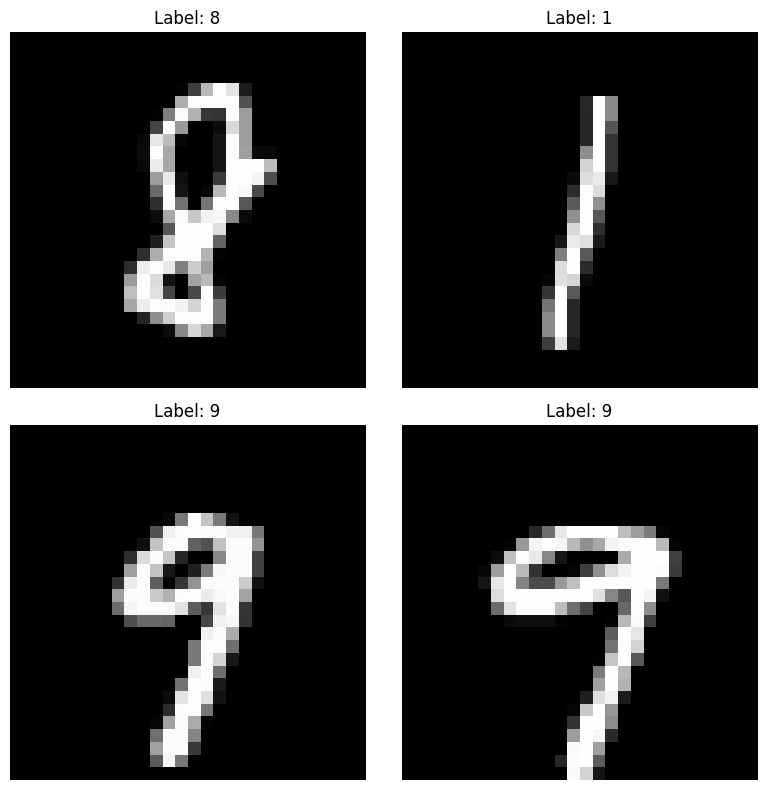

In [4]:
plot_grid(df)

In [5]:
sorted_label_percentages = count_labels_percentage_sorted(df)
print(sorted_label_percentages)

label
0     9.838095
1    11.152381
2     9.945238
3    10.359524
4     9.695238
5     9.035714
6     9.850000
7    10.478571
8     9.673810
9     9.971429
Name: proportion, dtype: float64


In [6]:
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)

In [7]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17290,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41320,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19502,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(count_labels_percentage_sorted(train_df))


label
0     9.922619
1    11.202381
2    10.059524
3    10.395833
4     9.699405
5     8.997024
6     9.785714
7    10.333333
8     9.681548
9     9.922619
Name: proportion, dtype: float64


In [9]:
print(count_labels_percentage_sorted(val_df))


label
0     9.500000
1    10.952381
2     9.488095
3    10.214286
4     9.678571
5     9.190476
6    10.107143
7    11.059524
8     9.642857
9    10.166667
Name: proportion, dtype: float64


In [10]:
def forward_pass(
    row: NDArray[np.float64], 
    W0: NDArray[np.float64], b0: NDArray[np.float64], 
    W1: NDArray[np.float64], b1: NDArray[np.float64],
    W2: NDArray[np.float64], b2: NDArray[np.float64]
) -> NDArray[np.float64]:

    # Layer 0 (Input to Hidden Layer 1)
    z0: NDArray[np.float64] = np.dot(row, W0) + b0  # Linear transformation
    a0: NDArray[np.float64] = relu(z0)              # Apply ReLU activation

    # Layer 1 (Hidden Layer 1 to Hidden Layer 2)
    z1: NDArray[np.float64] = np.dot(a0, W1) + b1   # Linear transformation
    a1: NDArray[np.float64] = relu(z1)              # Apply ReLU activation

    # Layer 2 (Hidden Layer 2 to Output Layer)
    z2: NDArray[np.float64] = np.dot(a1, W2) + b2   # Linear transformation
    output: NDArray[np.float64] = softmax(z2)       # Apply softmax to get probabilities

    return output

def cross_entropy_loss(output: NDArray[np.float64], target: NDArray[np.float64]) -> float:
    return -np.sum(target * np.log(output + 1e-9))  # Adding a small value to avoid log(0)



In [14]:

def relu(x: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.maximum(0, x)

def softmax(x: NDArray[np.float64]) -> NDArray[np.float64]:
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def cross_entropy_loss(output: NDArray[np.float64], target: NDArray[np.float64]) -> float:
    return -np.sum(target * np.log(output + 1e-9))


In [15]:
row: NDArray[np.float64] = df.iloc[0, 1:].values.astype(np.float64)

input_size = 784  # Number of input neurons (28x28 pixels)
hidden_layer_size = 10  # Number of neurons in the hidden layers
output_size = 10  # Number of output neurons (for digits 0-9)


# Random initialization of weights
W0: NDArray[np.float64] = np.random.randn(input_size, hidden_layer_size) * 0.01
W1: NDArray[np.float64] = np.random.randn(hidden_layer_size, hidden_layer_size) * 0.01
W2: NDArray[np.float64] = np.random.randn(hidden_layer_size, output_size) * 0.01

# Random initialization of biases
b0: NDArray[np.float64] = np.random.randn(hidden_layer_size) * 0.01
b1: NDArray[np.float64] = np.random.randn(hidden_layer_size) * 0.01
b2: NDArray[np.float64] = np.random.randn(output_size) * 0.01
output = forward_pass(row, W0, b0, W1, b1, W2, b2)
print(output)

[0.09858591 0.10125714 0.10052527 0.09926226 0.10077043 0.10094543
 0.10034162 0.09918815 0.0996525  0.09947129]


In [16]:
def backpropagate(
    row: NDArray[np.float64], 
    target: NDArray[np.float64],
    W0: NDArray[np.float64], b0: NDArray[np.float64], 
    W1: NDArray[np.float64], b1: NDArray[np.float64],
    W2: NDArray[np.float64], b2: NDArray[np.float64],
    learning_rate: float
):
    # Forward pass
    z0 = np.dot(row, W0) + b0
    a0 = relu(z0)

    z1 = np.dot(a0, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    output = softmax(z2)

    # Compute the loss (for reference)
    loss = cross_entropy_loss(output, target)
    print(f"Loss: {loss}")

    # Backward pass

    # Gradient of the loss with respect to the output
    dL_dz2 = output - target  # Gradient of cross-entropy loss with respect to z2

    # Gradients for W2 and b2
    dL_dW2 = np.outer(a1, dL_dz2)  # (10, 10)
    dL_db2 = dL_dz2  # (10,)

    # Backpropagate through the second layer (ReLU)
    dL_da1 = np.dot(W2, dL_dz2)  # (10,)
    dL_dz1 = dL_da1 * (z1 > 0)  # Derivative of ReLU with respect to z1

    # Gradients for W1 and b1
    dL_dW1 = np.outer(a0, dL_dz1)  # (10, 10)
    dL_db1 = dL_dz1  # (10,)

    # Backpropagate through the first layer (ReLU)
    dL_da0 = np.dot(W1, dL_dz1)  # (10,)
    dL_dz0 = dL_da0 * (z0 > 0)  # Derivative of ReLU with respect to z0

    # Gradients for W0 and b0
    dL_dW0 = np.outer(row, dL_dz0)  # (784, 10)
    dL_db0 = dL_dz0  # (10,)

    # Update weights and biases using gradient descent
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1

    W0 -= learning_rate * dL_dW0
    b0 -= learning_rate * dL_db0

    return W0, b0, W1, b1, W2, b2


In [17]:
# Assuming you have the data
row: NDArray[np.float64] = df.iloc[0, 1:].values.astype(np.float64)
target = np.zeros(10)
target[3] = 1  # Example target (e.g., digit '3')

# Initialize weights and biases
W0 = np.random.randn(784, 10) * 0.01
b0 = np.random.randn(10) * 0.01

W1 = np.random.randn(10, 10) * 0.01
b1 = np.random.randn(10) * 0.01

W2 = np.random.randn(10, 10) * 0.01
b2 = np.random.randn(10) * 0.01

learning_rate = 0.01

# Perform a single backpropagation step
W0, b0, W1, b1, W2, b2 = backpropagate(row, target, W0, b0, W1, b1, W2, b2, learning_rate)


Loss: 2.3065937583033636


In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple, List
from numpy.typing import NDArray

def relu(x: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.maximum(0, x)

def softmax(x: NDArray[np.float64]) -> NDArray[np.float64]:
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def cross_entropy_loss(output: NDArray[np.float64], target: NDArray[np.float64]) -> float:
    return -np.sum(target * np.log(output + 1e-9))

def forward_pass(
    X: NDArray[np.float64],
    W0: NDArray[np.float64], b0: NDArray[np.float64],
    W1: NDArray[np.float64], b1: NDArray[np.float64],
    W2: NDArray[np.float64], b2: NDArray[np.float64]
) -> Tuple[NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64]]:
    z0 = np.dot(X, W0) + b0
    a0 = relu(z0)
    z1 = np.dot(a0, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = softmax(z2)
    return output, a1, z1, a0, z0, X

def backpropagate(
    output: NDArray[np.float64], target: NDArray[np.float64],
    a1: NDArray[np.float64], z1: NDArray[np.float64],
    a0: NDArray[np.float64], z0: NDArray[np.float64],
    X: NDArray[np.float64],
    W0: NDArray[np.float64], b0: NDArray[np.float64],
    W1: NDArray[np.float64], b1: NDArray[np.float64],
    W2: NDArray[np.float64], b2: NDArray[np.float64],
    learning_rate: float
) -> Tuple[NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64], NDArray[np.float64]]:
    batch_size = output.shape[0]
    
    dL_dz2 = output - target
    dL_dW2 = np.dot(a1.T, dL_dz2) / batch_size
    dL_db2 = np.mean(dL_dz2, axis=0)

    dL_da1 = np.dot(dL_dz2, W2.T)
    dL_dz1 = dL_da1 * (z1 > 0)
    dL_dW1 = np.dot(a0.T, dL_dz1) / batch_size
    dL_db1 = np.mean(dL_dz1, axis=0)

    dL_da0 = np.dot(dL_dz1, W1.T)
    dL_dz0 = dL_da0 * (z0 > 0)
    dL_dW0 = np.dot(X.T, dL_dz0) / batch_size
    dL_db0 = np.mean(dL_dz0, axis=0)

    # Gradient clipping
    max_grad_norm = 1.0
    for grad in [dL_dW2, dL_db2, dL_dW1, dL_db1, dL_dW0, dL_db0]:
        np.clip(grad, -max_grad_norm, max_grad_norm, out=grad)

    # Update weights and biases
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W0 -= learning_rate * dL_dW0
    b0 -= learning_rate * dL_db0

    return W0, b0, W1, b1, W2, b2

def train_model(
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    hidden_layer_size: int = 128,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    epochs: int = 10
) -> Tuple[List[float], List[float], List[float], List[float]]:
    input_size = 784
    output_size = 10

    # Initialize weights and biases
    W0 = np.random.randn(input_size, hidden_layer_size) * np.sqrt(2. / input_size)
    b0 = np.zeros(hidden_layer_size)
    W1 = np.random.randn(hidden_layer_size, hidden_layer_size) * np.sqrt(2. / hidden_layer_size)
    b1 = np.zeros(hidden_layer_size)
    W2 = np.random.randn(hidden_layer_size, output_size) * np.sqrt(2. / hidden_layer_size)
    b2 = np.zeros(output_size)

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        # Shuffle the training data
        train_df = train_df.sample(frac=1).reset_index(drop=True)
        
        # Mini-batch training
        for start in range(0, len(train_df), batch_size):
            end = start + batch_size
            batch = train_df.iloc[start:end]
            
            X = batch.iloc[:, 1:].values.astype(np.float64) / 255.0
            y = batch.iloc[:, 0].values.astype(int)
            target = np.eye(10)[y]

            output, a1, z1, a0, z0, X = forward_pass(X, W0, b0, W1, b1, W2, b2)
            W0, b0, W1, b1, W2, b2 = backpropagate(output, target, a1, z1, a0, z0, X, W0, b0, W1, b1, W2, b2, learning_rate)

        # Evaluate on training set
        train_output, _, _, _, _, _ = forward_pass(train_df.iloc[:, 1:].values.astype(np.float64) / 255.0, W0, b0, W1, b1, W2, b2)
        train_loss = cross_entropy_loss(train_output, np.eye(10)[train_df.iloc[:, 0].values.astype(int)])
        train_accuracy = np.mean(np.argmax(train_output, axis=1) == train_df.iloc[:, 0].values)
        
        # Evaluate on validation set
        val_output, _, _, _, _, _ = forward_pass(val_df.iloc[:, 1:].values.astype(np.float64) / 255.0, W0, b0, W1, b1, W2, b2)
        val_loss = cross_entropy_loss(val_output, np.eye(10)[val_df.iloc[:, 0].values.astype(int)])
        val_accuracy = np.mean(np.argmax(val_output, axis=1) == val_df.iloc[:, 0].values)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

        # Learning rate decay
        learning_rate *= 0.95

    return train_losses, train_accuracies, val_losses, val_accuracies, W0, b0, W1, b1, W2, b2


# Usage
df = pd.read_csv('data/train.csv')
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)

train_losses, train_accuracies, val_losses, val_accuracies, W0, b0, W1, b1, W2, b2 = train_model(train_df, val_df)



Epoch 1/10, Train Loss: 12755.0986, Train Acc: 0.8955, Val Loss: 3251.6918, Val Acc: 0.8951


In [ ]:
def predict(X: NDArray[np.float64], W0: NDArray[np.float64], b0: NDArray[np.float64], W1: NDArray[np.float64], b1: NDArray[np.float64], W2: NDArray[np.float64], b2: NDArray[np.float64]) -> int:
    output, _, _, _, _, _ = forward_pass(X.reshape(1, -1), W0, b0, W1, b1, W2, b2)
    return np.argmax(output)

In [ ]:
def visualize_predictions_grid(val_df: pd.DataFrame, W0: NDArray[np.float64], b0: NDArray[np.float64], W1: NDArray[np.float64], b1: NDArray[np.float64], W2: NDArray[np.float64], b2: NDArray[np.float64], num_grids: int = 1):
    for grid in range(num_grids):
        # Select 9 random samples from the entire dataframe
        sample_df = val_df.sample(9)
        
        # Create a 3x3 subplot
        fig, axes = plt.subplots(3, 3, figsize=(12, 12))
        
        for i, ax in enumerate(axes.flat):
            # Extract the pixel values and reshape into a 28x28 array
            pixel_values = sample_df.iloc[i, 1:].values.astype(np.float64) / 255.0
            true_label = sample_df.iloc[i, 0]
            
            # Predict the digit
            predicted_digit = predict(pixel_values, W0, b0, W1, b1, W2, b2)
            
            # Plot the image on the current subplot
            ax.imshow(pixel_values.reshape(28, 28), cmap='gray')
            ax.set_title(f"True: {true_label}, Pred: {predicted_digit}")
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()


In [ ]:
visualize_predictions_grid(val_df, W0, b0, W1, b1, W2, b2)

In [ ]:
def get_incorrect_predictions(val_df: pd.DataFrame, W0: NDArray[np.float64], b0: NDArray[np.float64], W1: NDArray[np.float64], b1: NDArray[np.float64], W2: NDArray[np.float64], b2: NDArray[np.float64]) -> List[Tuple[int, int, int]]:
    incorrect_predictions = []
    
    for index, row in val_df.iterrows():
        true_label = row.iloc[0]
        pixel_values = row.iloc[1:].values.astype(np.float64) / 255.0
        predicted_digit = predict(pixel_values, W0, b0, W1, b1, W2, b2)
        
        if predicted_digit != true_label:
            incorrect_predictions.append((index, int(true_label), int(predicted_digit)))
    
    return incorrect_predictions


In [ ]:
incorrect_preds = get_incorrect_predictions(val_df, W0, b0, W1, b1, W2, b2)

# Print summary of incorrect predictions
print(f"Total incorrect predictions: {len(incorrect_preds)}")
print(f"Accuracy: {1 - len(incorrect_preds) / len(val_df):.4f}")

# Print first few incorrect predictions
print("\nSample of incorrect predictions (index, true label, predicted label):")
for pred in incorrect_preds[:10]:
    print(pred)
